# Sharing visualizations

## 1.1 Preparing figures to share with others
#### 1.1.1 Changing plot style

plt.style.use('ggplot')

plt.style.use('default')

plt.style.use('bmh')

plt.style.use('seaborn-colorblind')

plt.style.use('')

#### 1.1.2 Guidelines for choosing plotting style
1. Dark backgrounds are generally discouraged because they are usually less visible.
2. If color is important, consider choosing colorblind-friendly options. eg, seaborn-colorblind, tableau-colorblind10
3. Figures that are designed for use on websites have different considerations than figures in printed reports. If you think someone will want to print your figure, use less ink. Avoid colored backgrounds. If the printer likely to be used is a black and white one, consider using the 'grayscale' style to retain the differences you see on your screen when printed out. 



In [1]:
# load libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the dataframes
austin_weather = pd.read_csv('austin_weather.csv', index_col='DATE')
seattle_weather = pd.read_csv('seattle_weather.csv',index_col= 'DATE')

In [3]:
# TRANSFORM THE SEATTLE DATAFRAME

# slice the first 12 rows
seattle_weather = pd.DataFrame(seattle_weather.iloc[:12,:])

# add MONTH column
month_add = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
seattle_weather['MONTH'] = month_add

# TRANSFORM THE AUSTIN DATAFRAME

# add MONTH column
month_add = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
austin_weather['MONTH'] = month_add

#### 1.1.3 Switching between styles
Selecting a style to use affects all of the visualizations that are created after this style is selected.

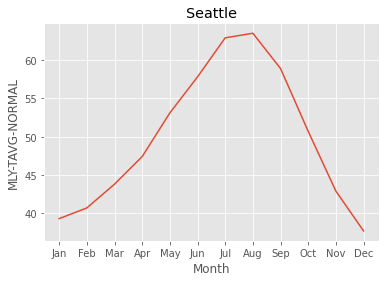

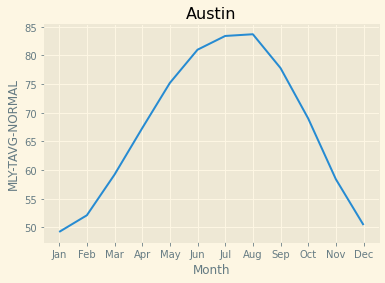

In [4]:
# use the ggplot style
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])
ax.set_title('Seattle')
ax.set_xlabel('Month')
ax.set_ylabel('MLY-TAVG-NORMAL')
plt.show()


plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
ax.set_title('Austin')
ax.set_xlabel('Month')
ax.set_ylabel('MLY-TAVG-NORMAL')
plt.show()

## 1.2 Saving visualizations. 
#### 1.2.1 Saving the figure to a file
Replace plt.show() with a call to fig.savefig('name.png')
Provide a file name as input to the function. The figure will no longer appear on the screen, but as a file in our file system.

calling the ls function gives a list of files in the current working directory. 

#### 1.2.2 Different file formats

1. PNG - This file format provides lossless compression of the image. The image will retain high quality but also take up relatively large amounts of disk space or bandwidth. 

2. JPG -  This format uses lossy compression and can be used to create figures that take up less disk space and less bandwidth. Used when for example the image is part of a website. 

3. SVG - This file format will produce a vector graphics file where different elements can be editted in detail by advanced graphics  softwares such as Gimp or Adobe Illustrator. 

#### Controlling file quality and size.
Set the quality keyword argument. This will be a number between 1 and 100, but you should avoid values above 95. Above that point compression is no longer effective.

fig.savefig('gold_medals.jpg', quality = 50)

#### Controlling the resolution
To control the quality of images that you produce, use the dpi key-word argument. Dots per inch. The higher the number of dpi, the more densly the image will be rendered and occupy more disk space. 

fig.savefig('gold_medals.png', dpi = 300)

#### Controlling the size of the figure
This function takes a sequence of numbers. The first number sets the width while the second the height. Aspect ratio.
fig.set_size_inches([5,3])

fig.set_size_inches([3,5])


## 1.3 Automating figures from data

#### 1.3.1 Why automate figure creation based on data?
1. Ease and speed
2. Flexibility
3. Robustness
4. Reproducibility

You can write functions and programs that automatically adjust what they are doing based on the input data. 

In [5]:
# import the dataframe
olympics = pd.read_csv('summer2016.csv')

In [6]:
# View the dataframe's information
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2014 non-null   int64  
 1   ID          2014 non-null   int64  
 2   Name        2014 non-null   object 
 3   Sex         2014 non-null   object 
 4   Age         2014 non-null   float64
 5   Height      2014 non-null   float64
 6   Weight      2014 non-null   float64
 7   Team        2014 non-null   object 
 8   NOC         2014 non-null   object 
 9   Games       2014 non-null   object 
 10  Year        2014 non-null   int64  
 11  Season      2014 non-null   object 
 12  City        2014 non-null   object 
 13  Sport       2014 non-null   object 
 14  Event       2014 non-null   object 
 15  Medal       2014 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 251.9+ KB


In [7]:
# How many sport branches are included in the data?
olympic_games  = olympics['Sport'].unique()
olympic_games

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

Too many olympic sports. We are going to subset the first 10 unique games for purposes of fitting in our showcase plot.
Subset the dataframe

In [8]:
first_games = ['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics','Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics']

In [9]:
summer_2016 = olympics[olympics['Sport'].isin(first_games)]
sports = summer_2016['Sport'].unique()
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics']


Visualize the height of athletes in each one of the sports, with a standard deviation error bar.

Given that we don't know in advance how many sports there are in the DF, once we have extracted the unique values, we can loop over them. In each iteration through, we set a loop variable called sport to be equal to one of these unique values. We then create a smaller dataframe: sport_df, by selecting the rows in which the sport column is equal to the sport selected in this iteration. 

C:\Users\Dave\AppData\Local\Temp/ipykernel_5076/3812682420.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation = 90)


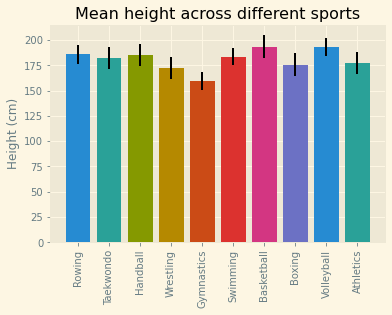

In [10]:
fig, ax = plt.subplots()
for sport in sports:
    sports_df = summer_2016[summer_2016['Sport'] == sport]
    ax.bar(sport, sports_df['Height'].mean(), yerr = sports_df['Height'].std())
ax.set_ylabel('Height (cm)')
ax.set_xticklabels(sports, rotation = 90)
ax.set_title('Mean height across different sports')
plt.show()

#### 1.3.2 unique values of a column

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In [11]:
# Extract the "Sport" column
sports_column = summer_2016['Sport']

# Find the unique values of the "Sport" column
sports_unique = sports_column.unique()

# Print out the unique sports values
print(sports_unique)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics']


#### Automate 

C:\Users\Dave\AppData\Local\Temp/ipykernel_5076/1286278814.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


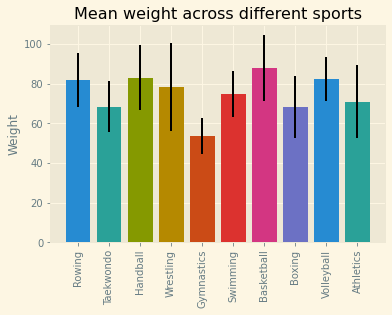

In [12]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016[summer_2016["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_title('Mean weight across different sports')
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")